<a href="https://colab.research.google.com/github/alessio76/Progetto-ML/blob/main/LSTM_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot
import json
from google.colab import files
import copy
from sklearn.preprocessing import StandardScaler
import time
from sklearn.datasets import load_breast_cancer

In [28]:
def build_model_n_layer(activation_hidden='relu', recurrent_activation='sigmoid', learning_rate=0.1, momentum=0, optimizer='SGD', n_neurons = 5, 
                loss = 'sparse_categorical_crossentropy', regularization = None, recurrent_regularization=None, n_layers = 1, n_features = 30, init_mode = 'glorot_uniform'):
   n_classes = 2
   hidden_layers = list()

   for i in range(n_layers-1):
     layer = tf.keras.layers.LSTM(n_neurons, activation=activation_hidden, recurrent_activation=recurrent_activation, kernel_regularizer= regularization,
                                  recurrent_regularizer=recurrent_regularization, return_sequences=True, kernel_initializer=init_mode)
     hidden_layers.append(layer)
     
   first_layer = [tf.keras.layers.LSTM(n_features, activation=activation_hidden, input_shape=(n_features,1), recurrent_activation=recurrent_activation, 
                                       kernel_regularizer= regularization, recurrent_regularizer=recurrent_regularization, return_sequences = True, kernel_initializer=init_mode)]

   last_layer = [tf.keras.layers.LSTM(n_neurons, activation=activation_hidden, recurrent_activation=recurrent_activation, kernel_regularizer= regularization,
                                      recurrent_regularizer=recurrent_regularization, kernel_initializer=init_mode),
                tf.keras.layers.Dense(n_classes, activation='softmax', kernel_initializer=init_mode)]            
   
   total_layers = first_layer + hidden_layers + last_layer                          
   model = tf.keras.Sequential(total_layers)
  
   if optimizer == 'SGD':
         optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)


   model.compile(loss=loss, optimizer=optimizer, metrics = 'accuracy')
   return model

In [15]:
def scoring(train_x, train_y, test_x, test_y, model):
  y_pred_test, y_pred_train = model.predict(input_test), model.predict(input_train)
  y_pred_test, y_pred_train = transform_y_pred(y_pred_test), transform_y_pred(y_pred_train)
  compute_precision, compute_recall = tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
  compute_precision.update_state(train_y, y_pred_train)
  compute_recall.update_state(train_y, y_pred_train)
  train_precision, train_recall = compute_precision.result(), compute_recall.result()

  compute_precision.update_state(test_y, y_pred_test)
  compute_recall.update_state(test_y, y_pred_test)
  test_precision, test_recall = compute_precision.result(), compute_recall.result()

  print("Train:", "Precision = ",train_precision, "Recall = ", train_recall, '\n')
  print("Test:", "Precision = ",test_precision, "Recall = ", test_recall, '\n')

In [5]:
def transform_y_pred(pred_y):
  transformed_y = list()
  for i in range(pred_y.shape[0]):
    actual_max = max(pred_y[i, :])
    transformed_y.append(list(np.where(pred_y[i,:] == actual_max))[0])
  return transformed_y


In [18]:
def transform_x(x):  
  length = x.shape[0]
  transformed_x = np.array(x)
  transformed_x = np.reshape(transformed_x, (transformed_x.shape[0], transformed_x.shape[1], 1))
  return transformed_x

In [6]:
def plot(history):
 #plotter = tfdocs.plots.HistoryPlotter(smoothing_std=0)
 epochs = history.epoch
 plt.plot(epochs, history.history['accuracy'])
 plt.xlabel("epochs")
 plt.ylabel('Accuracy_train')
 plt.show()

 plt.plot(epochs, history.history['val_accuracy'])
 plt.xlabel("epochs")
 plt.ylabel('Accuracy_val')
 plt.show()

 plt.plot(epochs, history.history['loss'])
 plt.xlabel("epochs")
 plt.ylabel('Loss_train')
 plt.show()

 plt.plot(epochs, history.history['val_loss'])
 plt.xlabel("epochs")
 plt.ylabel('Loss_test')
 plt.show()

In [7]:
#dataset è un dizionario
dataset = load_breast_cancer()
x,y = dataset["data"], dataset["target"]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.2, random_state=1)
print(train_x.shape, test_x.shape)
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

(455, 30) (114, 30)


Anche qui ADAM più regolare, L1 migliora regolarità più di L2

In [42]:
print(model_n_layers_param)

{'n_neurons': 10, 'n_layers': 4, 'activation_hidden': 'tanh', 'learning_rate': 0.3, 'regularization': <keras.regularizers.L1 object at 0x7fc855dc8d90>, 'recurrent_regularization': <keras.regularizers.L1 object at 0x7fc855dc8b50>}


soltanto glorot e he danno performance accettabili, glorot leggermente superiore. L2 meglio di L1, SGD non è adatto

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_345 (LSTM)              (None, 30, 30)            3840      
_________________________________________________________________
lstm_341 (LSTM)              (None, 30, 20)            4080      
_________________________________________________________________
lstm_342 (LSTM)              (None, 30, 20)            3280      
_________________________________________________________________
lstm_343 (LSTM)              (None, 30, 20)            3280      
_________________________________________________________________
lstm_344 (LSTM)              (None, 30, 20)            3280      
_________________________________________________________________
lstm_346 (LSTM)              (None, 20)                3280      
_________________________________________________________________
dense_61 (Dense)             (None, 2)               

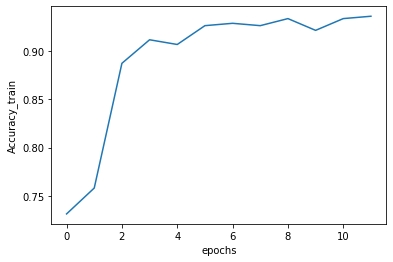

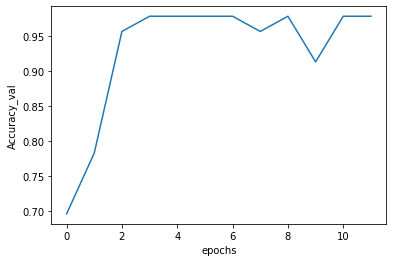

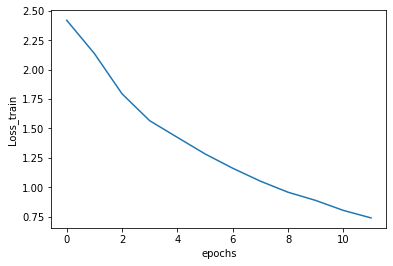

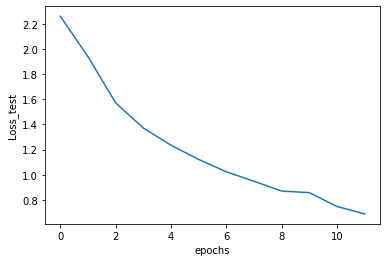

In [81]:
model_n_layers_param = dict()
model_n_layers_param["n_neurons"] = 20
model_n_layers_param["n_layers"] = 5
model_n_layers_param["activation_hidden"] = 'tanh'
model_n_layers_param["optimizer"] = 'Adam'
model_n_layers_param["learning_rate"] = .3
model_n_layers_param["regularization"] = tf.keras.regularizers.L2(.01)
model_n_layers_param["recurrent_regularization"] = tf.keras.regularizers.L2(.001)
init_mode = ['random_uniform', 'random_normal', 'zero', 'glorot_normal', 'glorot_uniform','he_normal', 'he_uniform']
model_n_layers_param["init_mode"] = 'glorot_uniform'
batch_size = 50
epochs = 12
model4 = build_model_n_layer(**model_n_layers_param)
model4.summary()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
start = time.time()
input_train, input_test = transform_x(train_x), transform_x(test_x)
history = model4.fit(input_train, train_y, epochs=epochs, batch_size=batch_size,  validation_split = 0.1, shuffle=True, verbose=0, callbacks=[early_stop])
print('\nTraining MLP completato in %.2f s.' % (time.time() - start))
scoring(input_train, train_y, input_test, test_y, model4)
plot(history)